In [6]:
# Exercici 1
# Crea almenys tres models de classificació diferents per intentar predir el millor possible 
# l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

dataframe = pd.read_csv('archive/DelayedFlights.csv', header=0, sep=',',encoding='utf-8', dayfirst=True)
dfArr=dataframe.loc[dataframe['ArrDelay'] > 0]
#df.loc[:10]

df = dfArr.loc[:9000]

############################ Característiques de les dades carregades ###############################

print ("Head:\n" + str(df.head()))     # Els camps de cabçelera
print ("shape:\n" + str(df.shape))
print ("Columnes:\n" + str(df.columns))
print ("Correlacio:\n" + str(df.corr()))

############################################### Trantament de les dades ##############################################


# Treiem del conjunt de dades vols que han estat cancel·lats i derivats
df2 = df.loc[df.loc[:,'Cancelled'] == 0]
df2 = df2.loc[df2.loc[:,'Diverted'] == 0]
print ("shape:\n" + str(df2.shape))

# Eliminem del conjunt de dades, variables que no anem a utilitzar
df3 = df2.drop(['UniqueCarrier','Year','DepTime','CRSDepTime','ArrTime','CRSArrTime','FlightNum','TailNum','Cancelled','CancellationCode','Diverted'], axis = 1)
print ("shape:\n" + str(df3.shape))

# Terme quadràtic de la variable TaxiOut  i creem noves variables que ens poden ser d'interès
df3['TaxiOut2'] = df3['TaxiOut']**2 

# La companyia WN era quina presentava més endarreriments, creem variable dummy que ens indiqui si la companyia és WN o no (vist en exercicis anteriors)
# df3['CarrierWN'] = (df3['UniqueCarrier'] == 'WN').astype(int)

# Creem dummy que ens indiqui el dia de la setmana
dummy = pd.get_dummies(df3['DayOfWeek'])
df4 = pd.concat([df3, dummy], axis = 1)
df_ok = df4.rename(columns={1:'Dll',2:'Dm',3:'Dx',4:'Dj',5:'Dv',6:'Ds',7:'Dg'})

############################ Característiques de les dades carregades del dataframe optimitzat ##########################

# La variable ArrDelay que serà la nostra variable resposta (y), la resta seran variables explicatives o independents(X). Creem els conjunts de dades corresponents.
X, y = df_ok.loc[:, df_ok.columns != 'ArrDelay'], df_ok.loc[:,'ArrDelay']

print ("Head:\n" + str(df_ok.head()))  # Els camps de cabçelera del nou dataframe
print ("Columnes:\n" + str(df_ok.columns))
print(X.shape, y.shape)

Head:
   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   
5           6  2008      1           3          4   1937.0        1830   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   
5   2037.0        1940            WN  ...     3.0     7.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
1                 N         0           NaN   

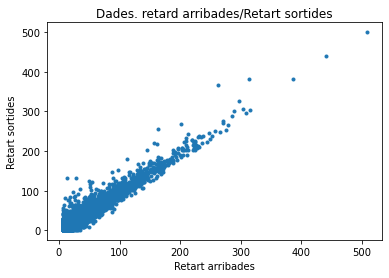

Resum Model 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 9.403e+04
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:01:01   Log-Likelihood:                -29817.
No. Observations:                7922   AIC:                         5.964e+04
Df Residuals:                    7920   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0591      0.169    -12.213      0.000      -2.390      -1.729
DepDelay       0.9887      0.003    306.650      0.000       0.982       0.995
==============================================================================
Omnibus:                     3730.460   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51131.954
Skew:                           1.902   Prob(JB):                         0.00
Kurtosis:                      14.851   Cond. No.                         75.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Model 1
# Models de classificació
# Relació lineal entre les variables ArrDelay i DepDelay.

#################################### Gràfic de dades ####################################
plt.scatter(X['DepDelay'],y,marker='.')
plt.xlabel("Retart arribades")
plt.ylabel("Retart sortides")
plt.title("Dades. retard arribades/Retart sortides")
plt.show()


import statsmodels.api as sm # llibreria statsmodels

# Subconjunt amb només DepDelay com variable
X1 = X['DepDelay']

# Ajustem el model
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()

print ("Resum Model 1")
model1.summary()


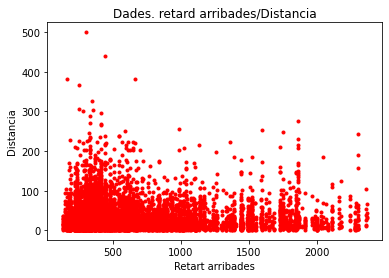

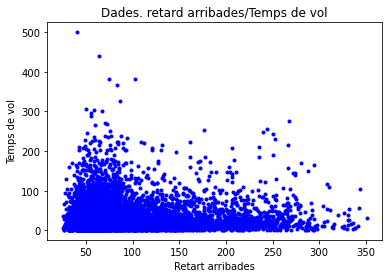

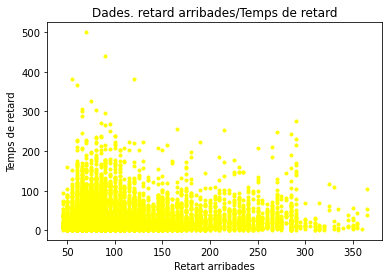

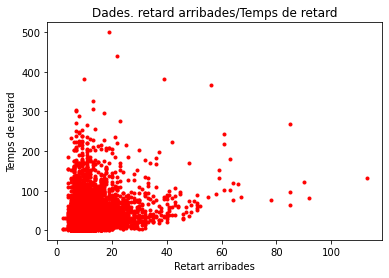

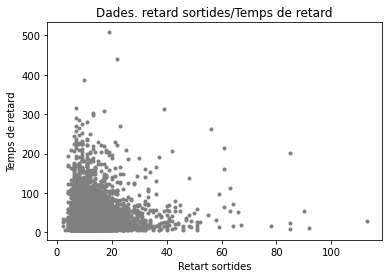

Resum Model 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 6.799e+04
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:01:04   Log-Likelihood:                -28451.
No. Observations:                7922   AIC:                         5.691e+04
Df Residuals:                    7919   BIC:                         5.693e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.7315      0.221    -53.086      0.000     -12.165     -11.298
DepDelay       0.9811      0.003    361.093      0.000       0.976       0.986
TaxiOut        0.8725      0.015     57.095      0.000       0.843       0.902
==============================================================================
Omnibus:                     2189.039   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19951.298
Skew:                           1.061   Prob(JB):                         0.00
Kurtosis:                      10.479   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Model 2
# Models de classificació
# Explorem altres variables X que estarien correlacionades amb la variable ArrDelay

#################################### Gràfic de dades ####################################
plt.scatter(X['Distance'],y,marker='.',color = 'Red')
plt.xlabel("Retart arribades")
plt.ylabel("Distancia")
plt.title("Dades. retard arribades/Distancia")
plt.show()

plt.scatter(X['AirTime'],y,marker='.',color = 'Blue')
plt.xlabel("Retart arribades")
plt.ylabel("Temps de vol")
plt.title("Dades. retard arribades/Temps de vol")
plt.show()

plt.scatter(X['CRSElapsedTime'],y,marker='.',color = 'Yellow')
plt.xlabel("Retart arribades")
plt.ylabel("Temps de retard")
plt.title("Dades. retard arribades/Temps de retard")
plt.show()

plt.scatter(X['TaxiOut'],y,marker='.',color = 'Red')
plt.xlabel("Retart arribades")
plt.ylabel("Temps de retard")
plt.title("Dades. retard arribades/Temps de retard")
plt.show()

# Creem el subconjunt de dades amb la nova variable
X2 = X[['DepDelay', 'TaxiOut']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

#################################### Gràfic de dades ####################################

plt.scatter(X['TaxiOut'],X['DepDelay'],marker='.',color = 'Grey')
plt.xlabel("Retart sortides")
plt.ylabel("Temps de retard")
plt.title("Dades. retard sortides/Temps de retard")
plt.show()

print ("Resum Model 2")
model2.summary()


In [10]:
# Model 3
# Models de classificació
# Afegim el dia de la setmana amb variabbles afegides

X3 = X[['DepDelay','TaxiOut','Dll', 'Dm', 'Dm', 'Dj','Dv','Ds']]

X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()

print ("Resum Model 3")
model3.summary()


Resum Model 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.957e+04
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:01:06   Log-Likelihood:                -28422.
No. Observations:                7922   AIC:                         5.686e+04
Df Residuals:                    7914   BIC:                         5.692e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.6431      0.277    -42.010      0.000     -12.186     -11.100
DepDelay       0.9810      0.003    359.734      0.000       0.976       0.986
TaxiOut        0.8698      0.015     57.091      0.000       0.840       0.900
Dll            1.3672      0.360      3.801      0.000       0.662       2.072
Dm            -0.1659      0.188     -0.881      0.378      -0.535       0.203
Dm            -0.1659      0.188     -0.881      0.378      -0.535       0.203
Dj            -1.3265      0.302     -4.396      0.000      -1.918      -0.735
Dv             0.0411      0.299      0.137      0.891      -0.546       0.628
Ds             0.4193      0.311      1.347      0.178      -0.191       1.029
==============================================================================
Omnibus:                     2100.283   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18164.119
Skew:                           1.024   Prob(JB):                         0.00
Kurtosis:                      10.130   Cond. No.                     1.06e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
# Exercici 2 (Revisio)
# Compara els models de classificació utilitzant la precisió (accuracy), 
# una matriu de confiança i d’altres mètriques més avançades.

# Model 2 (LogisticRegression)
# Creem el subconjunt de dades X amb les variables explicatives seleccionades, 
# variables que ja haviem utilitzat en altres models anteriorment

# Escalem les dades
from sklearn.preprocessing import StandardScaler
X2 = X[['DepDelay','TaxiOut','Distance']]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=1)

escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Ajustem el model de regressió logística
logreg2 = LogisticRegression(max_iter=300)
logreg2.fit(X_train, y)

# Model 2 (LogisticRegression)
# Primer de tot, calculem els valors predits
y_logreg2_pred = logreg2.predict(X_train)

# Calculem diferents estimadors per a comparar els models
report2 = classification_report(y, y_logreg2_pred,digits=3,output_dict = True)

print("LogReg Model:")
print("Accuracy = {0:0.3f}".format(report2["accuracy"]))
#print("Precision = {0:0.3f}".format(report2["1"]["precision"]))
#print("Specificity = {0:0.3f}".format(report2["0"]["recall"]))
#print("Sensitivity = {0:0.3f}".format(report2["1"]["recall"]))
#print("F1-score = {0:0.3f}".format(report2["1"]["f1-score"]))

print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_logreg2_pred))

conf2 = metrics.confusion_matrix(y, y_logreg2_pred)
print("True positives:", conf2[1,1])
print("True negatives:", conf2[0,0])
print("False Positives:", conf2[0,1])
print("False Negatives:", conf2[1,0])


#Plotting the ROC curve
#generate predicted probabilites
y_logreg2_pred_prob = logreg2.predict_proba(X2)

#Generating points to plot on ROC curve (logistic model)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y, y_logreg2_pred_prob[:,1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.3f}'.format(roc_auc_score(y,y_logreg2_pred_prob[:,1])))
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [2377, 7922]

In [91]:
# Exercici 2
# Compara els models de classificació utilitzant la precisió (accuracy), 
# una matriu de confiança i d’altres mètriques més avançades.

# Model 1
X1 = X[['DepDelay']]
lm = LogisticRegression()
model1_sk = lm.fit(X1,y)
pred1_sk = model1_sk.predict(X1)

report1 = classification_report(y, pred1_sk,digits=3,output_dict = True)

print ("Comparacio Model de classificació 1")
print("Accuracy = {0:0.3f}".format(report1["accuracy"]))
#print("Precision = {0:0.3f}".format(report1["1"]["precision"]))
#print("Specificity = {0:0.3f}".format(report1["0"]["recall"]))
#print("Sensitivity = {0:0.3f}".format(report1["1"]["recall"]))
#print("F1-score = {0:0.3f}".format(report1["1"]["f1-score"]))


# Model 2
X2 = X[['DepDelay', 'TaxiOut']]
lm = LogisticRegression()
model2_sk = lm.fit(X2,y)
pred2_sk = model2_sk.predict(X2)

report2 = classification_report(y, pred2_sk,digits=3,output_dict = True)

print ("Comparacio Model de classificació 2")
print("Accuracy = {0:0.3f}".format(report2["accuracy"]))
#print("Precision = {0:0.3f}".format(report2["1"]["precision"]))
#print("Specificity = {0:0.3f}".format(report2["0"]["recall"]))
#print("Sensitivity = {0:0.3f}".format(report2["1"]["recall"]))
#print("F1-score = {0:0.3f}".format(report2["1"]["f1-score"]))

# Model 3
X3 = X[['DepDelay','TaxiOut','Dll', 'Dm', 'Dm', 'Dj','Dv','Ds']]
lm = LogisticRegression()
model3_sk = lm.fit(X3,y)
pred3_sk = model3_sk.predict(X3)

report3 = classification_report(y, pred3_sk,digits=3,output_dict = True)

print ("Comparacio Model de classificació 3")
print("Accuracy = {0:0.3f}".format(report3["accuracy"]))
#print("Precision = {0:0.3f}".format(report3["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report3["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report3["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report3["1"]["f1-score"]))


Comparacio Model de classificació 1
Accuracy = 0.064


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

KeyError: '0'

In [15]:
# Exercici 3
# Entrena’ls utilitzant els diferents paràmetres que admeten.

#################################### Dades Train y test entrenament ####################################


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

logisticRegr.predict(x_test[0].reshape(1,-1))

logisticRegr.predict(x_test[0:10])

predictions = logisticRegr.predict(x_test)



(5545, 28) (2377, 28) (5545,) (2377,)


ValueError: could not convert string to float: 'WN'

In [ ]:
# Exercici 4
# Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

# Model 1
X_test1 = X_test[['DepDelay']]
y_pred1_sk = model_train1_sk.predict(X_test1)

print ("Rendiment Model 1")
print("Accuracy:\n",str(metrics.accuracy_score(y, pred1_sk)))
print("Confusion matrix:\n",str(metrics.confusion_matrix(y, pred1_sk)))

# Model 2
X_test2 = X_test[['DepDelay', 'TaxiOut']]
y_pred2_sk = model_train2_sk.predict(X_test2)
print ("Rendiment Model 2")
print("Accuracy:\n",str(metrics.accuracy_score(y, pred2_sk)))
print("Confusion matrix:\n",str(metrics.confusion_matrix(y, pred2_sk)))

#Model 3
X_test3 = X_test[['DepDelay','TaxiOut','Dll', 'Dm', 'Dm', 'Dj','Dv','Ds']]
y_pred3_sk = model_train3_sk.predict(X_test3)
print ("Rendiment Model 3")
print("Accuracy:\n",str(metrics.accuracy_score(y, pred3_sk)))
print("Confusion matrix:\n",str(metrics.confusion_matrix(y, pred3_sk)))


In [13]:
# Exercici 5
# Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

X_train5 = X_train[['DepDelay','TaxiOut','TaxiOut2']]
X_train5 = sm.add_constant(X_train5)
model5 = sm.OLS(y_train, X_train5).fit()

print ("Resum Model")
print(model5.summary())

X_train5b = X_train[['DepDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]
X_train5b = sm.add_constant(X_train5b)
model5b = sm.OLS(y_train, X_train5b).fit()

print ("Resum Model")
print(model5b.summary())

# Afegint aquestes variables hem arribat a un model on totes les variables són significatives i el coeficient de determinació és del 95.5%

X_train5b = X_train[['DepDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]
X_test5b = X_test[['DepDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]
lm5b = LogisticRegression()
model_train5b_sk = lm5b.fit(X_train5b,y_train)

y_pred5b_sk = model_train5b_sk.predict(X_test5b)
print ("Rendiment Model")
print("Accuracy:\n",str(metrics.accuracy_score(y, y_pred5b_sk)))
print("Confusion matrix:\n",str(metrics.confusion_matrix(y, y_pred5b_sk)))

NameError: name 'X_train' is not defined

In [ ]:
# Exercici 6
# No utilitzis la variable DepDelay a l’hora de fer prediccions

dfNUM = df3.loc[:,['ArrDelay','ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Distance','TaxiIn','TaxiOut']]
corrMatrix = dfNUM.corr()
print (corrMatrix)
  
# Correlacio DepDelay amb ArrDelay.

X_train6 = X_train[['TaxiIn','TaxiOut','Distance','CarrierWN']]
X_train6 = sm.add_constant(X_train6)
model6 = sm.OLS(y_train, X_train6).fit()

print ("Resum Model")
print(model6.summary())

# El coeficient de determinació
X_train6 = X_train[['TaxiIn','TaxiOut','Distance','CarrierWN']]
X_test6 = X_test[['TaxiIn','TaxiOut','Distance','CarrierWN']]
lm6 = LogisticRegression()
model_train6_sk = lm6.fit(X_train6,y_train)

y_pred6_sk = model_train6_sk.predict(X_test6)
print ("Rendiment Model")
print("Accuracy:\n",str(metrics.accuracy_score(y, y_pred6_sk)))
print("Confusion matrix:\n",str(metrics.confusion_matrix(y, y_pred6_sk)))